# **Car Price Prediction**

To find the car price from the various features such as the year of manufacture, selling price, kilometers driven, fuel type, seller type, transmission type, number of previous owners, mileage, and engine specifications

## **1] Importing libraries**

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FuncFormatter

from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore')


## **2] Data Collection**

In [5]:
data = pd.read_csv('car_pred.csv')

Priting the first few columns of the dataset

In [6]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


Shape of the Data

In [7]:
data.shape

(8128, 12)

There are 8128 rows and 12 columns in the dataset

## **3] Exploratory Data Analysis**

Getting the dataset information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


This dataset has:
* 12 columns
* 8128 rows
* 6 categorical features (name,fuel,seller_type,transmission,owner,max_power)
* 5 numerical features (year,km_driven,mileage,engine,seats)
* target variable is selling_price

Getting statistics of the data:

In [9]:
#for numerical features

data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [10]:
#for categorical features

data.describe(include='object')

,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


Visulizing the data

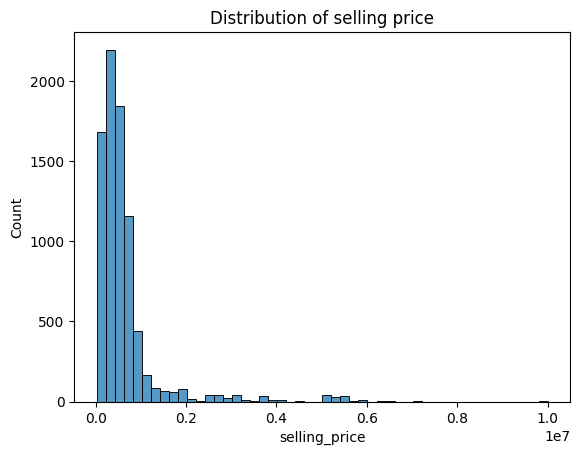

In [11]:
sns.histplot(data=data,x='selling_price',bins=50)
plt.title('Distribution of selling price')
plt.show()

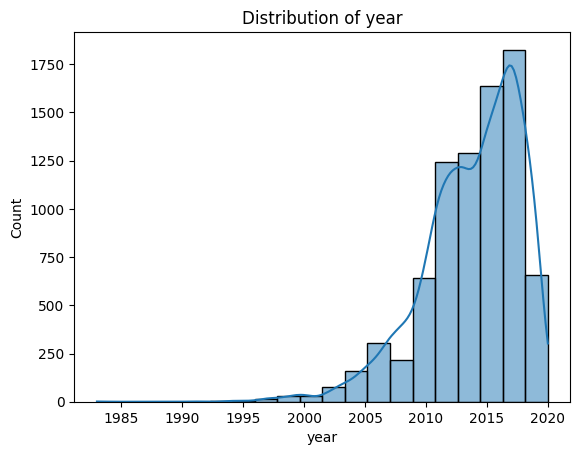

In [12]:
sns.histplot(data=data,x='year',bins=20,kde=True)
plt.title('Distribution of year')
plt.show()

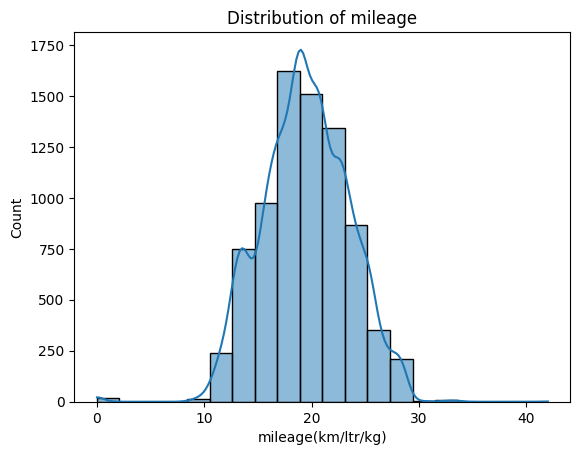

In [13]:
sns.histplot(data=data,x='mileage(km/ltr/kg)',bins=20,kde=True)
plt.title('Distribution of mileage')
plt.show()

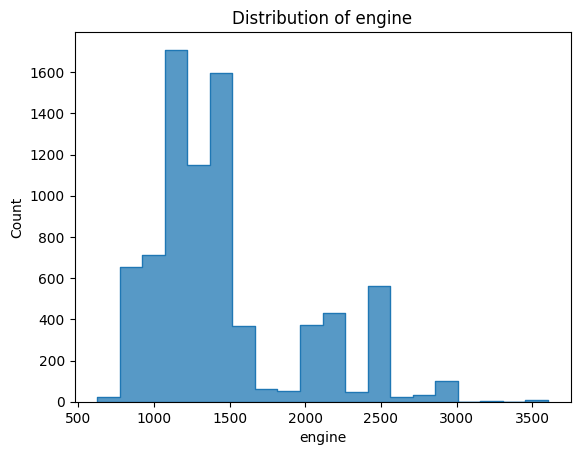

In [14]:
sns.histplot(data=data,x='engine',bins=20,element='step')
plt.title('Distribution of engine')
plt.show()

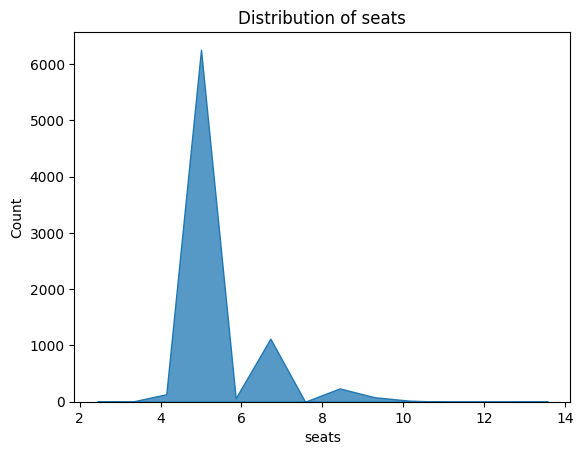

In [15]:
sns.histplot(data=data,x='seats',element='poly')
plt.title('Distribution of seats')
plt.show()

In [16]:
data['max_power'] = pd.to_numeric(data['max_power'],errors='coerce')

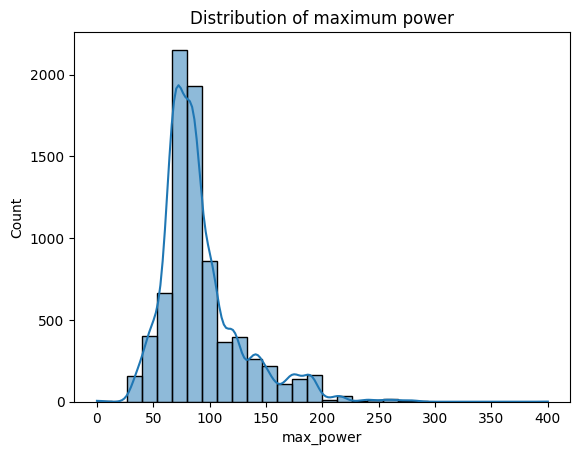

In [17]:
sns.histplot(data=data,x='max_power',bins=30,kde=True)
plt.title('Distribution of maximum power')
plt.show()

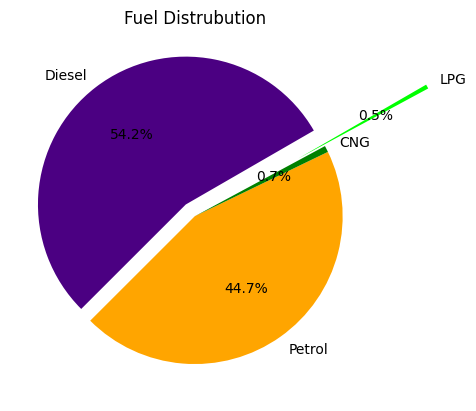

In [18]:
explode=(0.1,0,0,0.8)
colors=['indigo','orange','green','lime']

plt.pie(data['fuel'].value_counts(),
        labels=data['fuel'].value_counts().index,
        autopct='%1.1f%%',
        startangle=30,
        explode=explode,
        colors=colors)
plt.title('Fuel Distrubution')
plt.show()

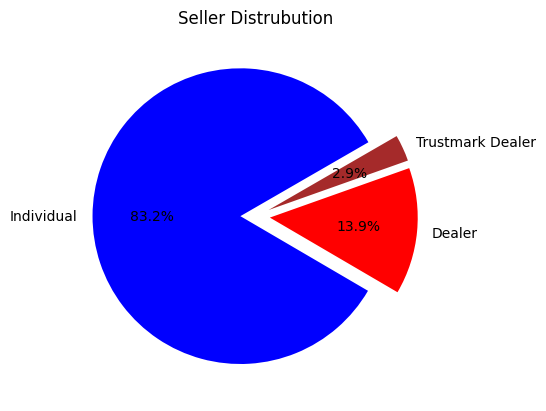

In [19]:
explode=(0.1,0.1,0.1)
colors=['blue','red','brown']

plt.pie(data['seller_type'].value_counts(),
        labels=data['seller_type'].value_counts().index,
        autopct='%1.1f%%',
        startangle=30,
        explode=explode,
        colors=colors)
plt.title('Seller Distrubution')
plt.show()

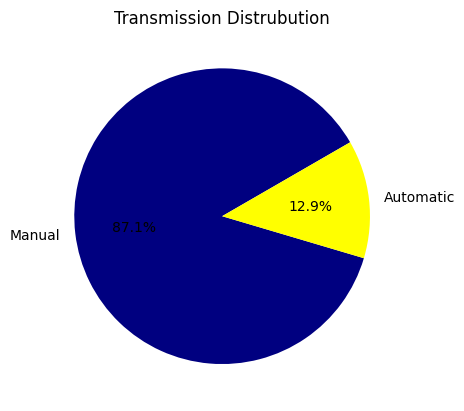

In [20]:
explode=(0.1,0,0,0.8)
colors=['navy','yellow']

plt.pie(data['transmission'].value_counts(),
        labels=data['transmission'].value_counts().index,
        autopct='%1.1f%%',
        startangle=30,
        colors=colors)
plt.title('Transmission Distrubution')
plt.show()

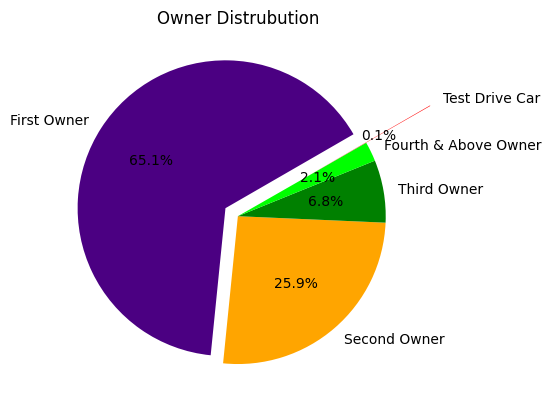

In [21]:
explode=(0.1,0,0,0.0,0.5)
colors=['indigo','orange','green','lime','red']

plt.pie(data['owner'].value_counts(),
        labels=data['owner'].value_counts().index,
        autopct='%1.1f%%',
        startangle=30,
        explode=explode,
        colors=colors)
plt.title('Owner Distrubution')
plt.show()

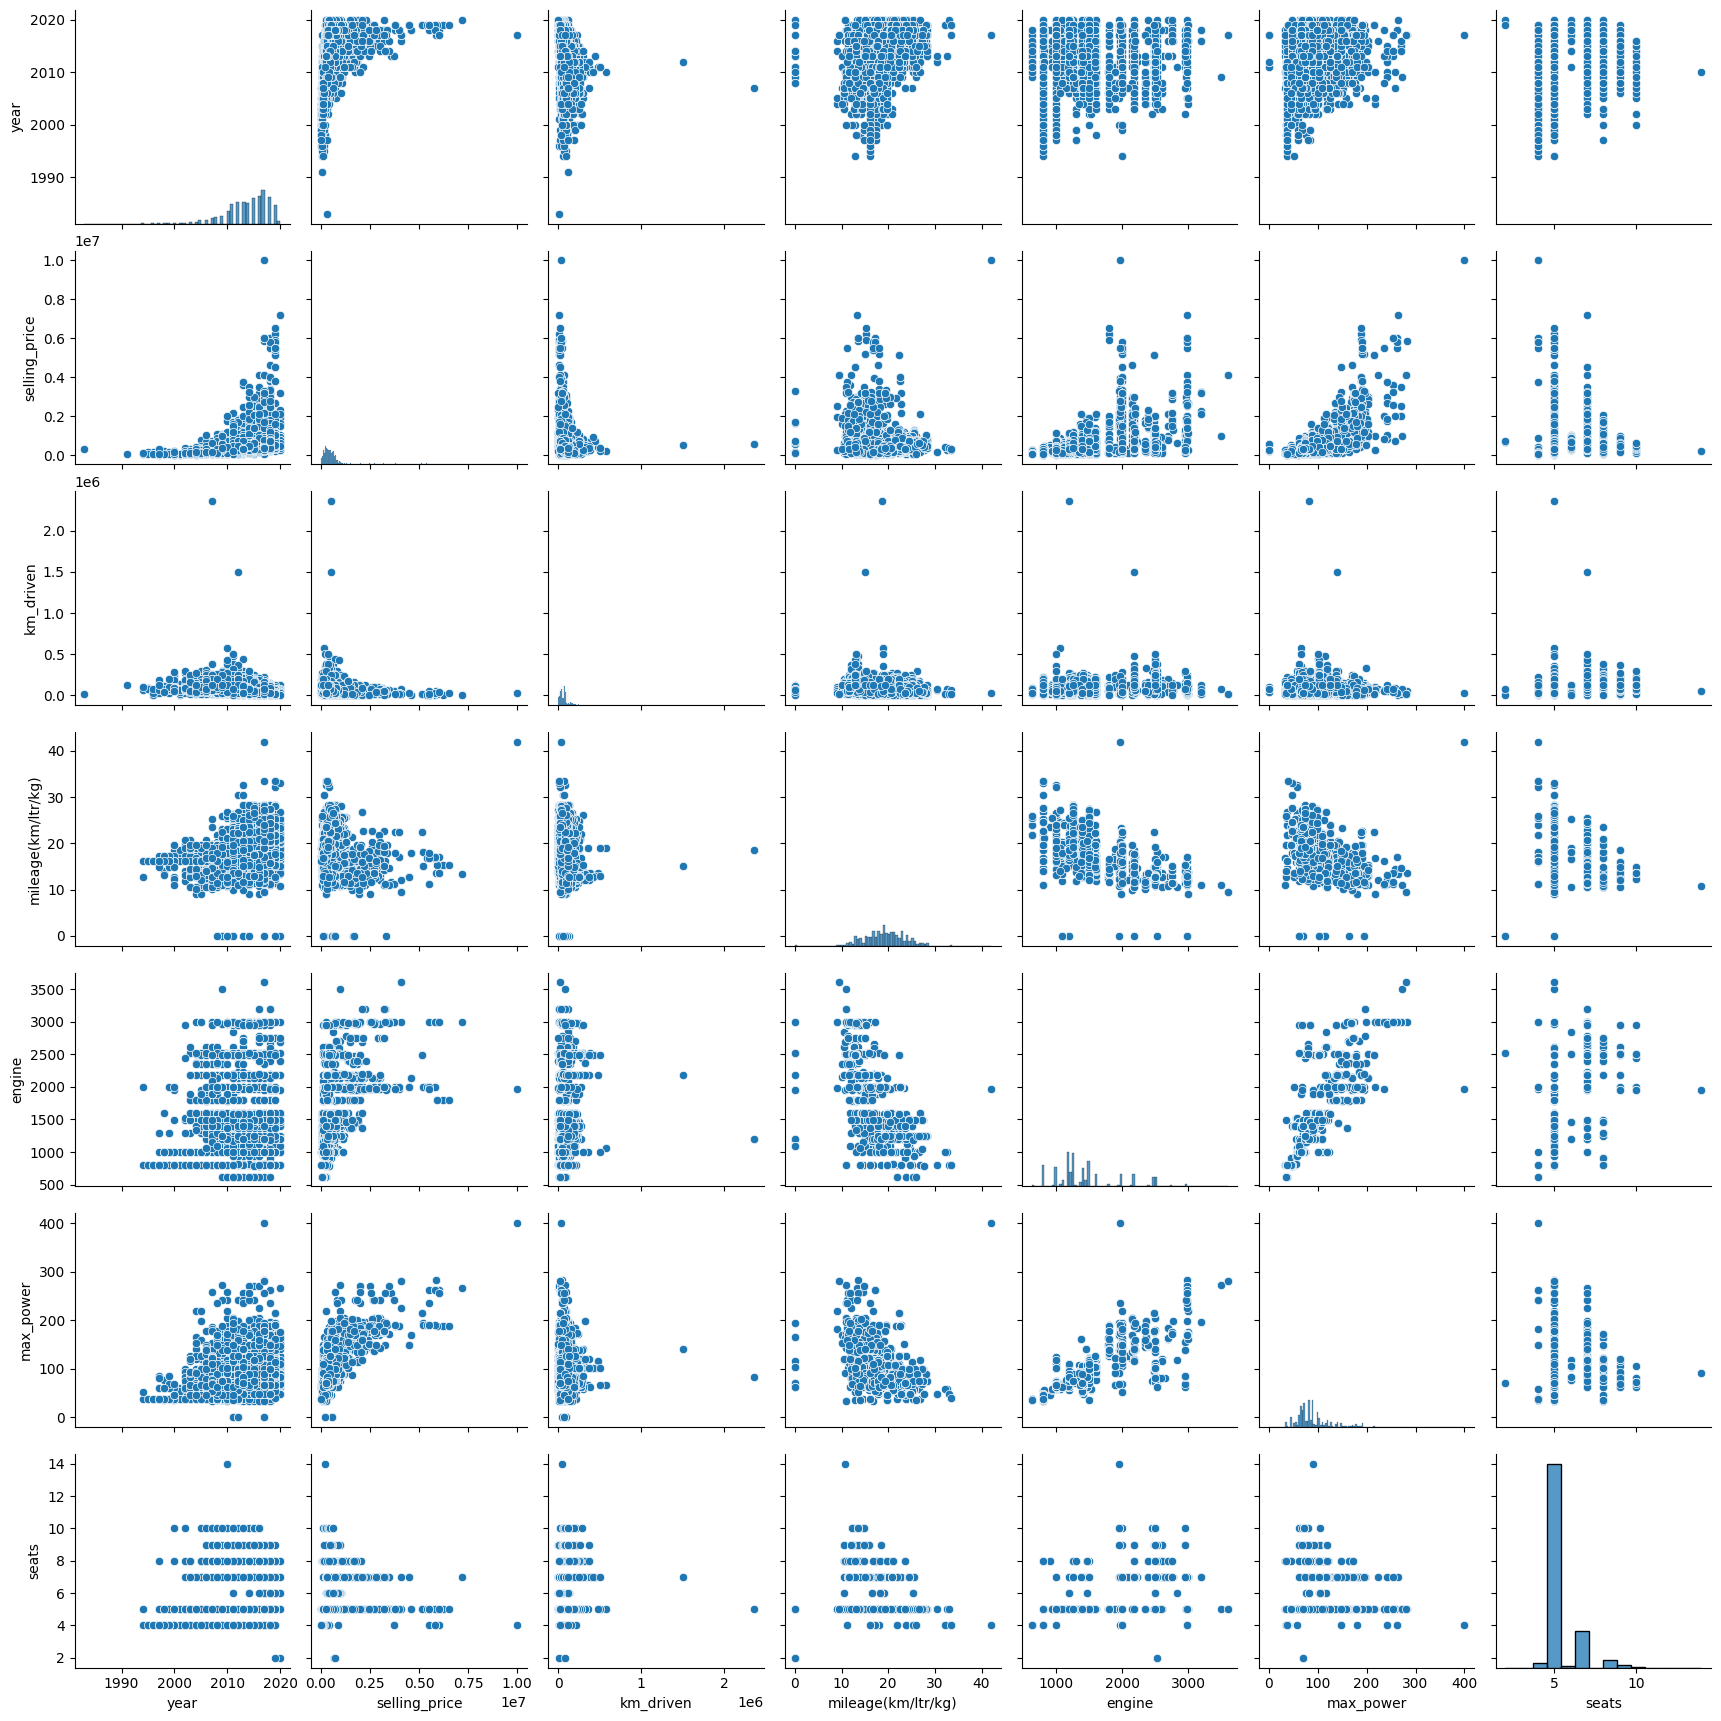

In [22]:
sns.pairplot(data=data)

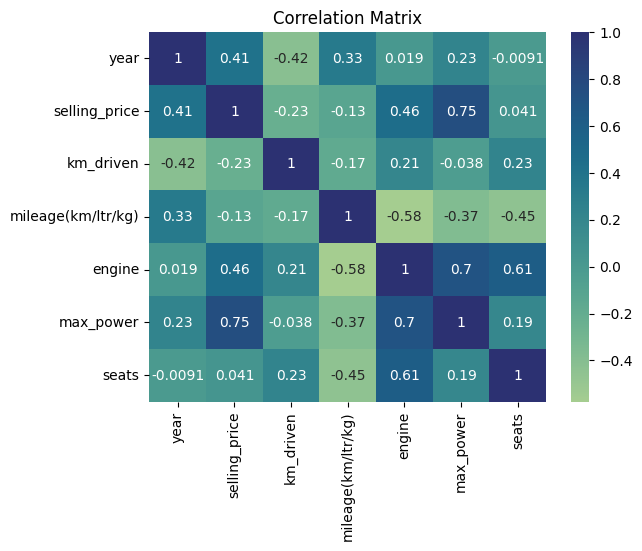

In [23]:
num_data=data.select_dtypes(include=['int64','float64']).columns
corr = data[num_data].corr()
sns.heatmap(data=corr,annot=True,cmap='crest')
plt.title('Correlation Matrix')
plt.show()

Inference:
* max_power and selling_price has high correlation of 0.75
* As max power increases selling price also increases

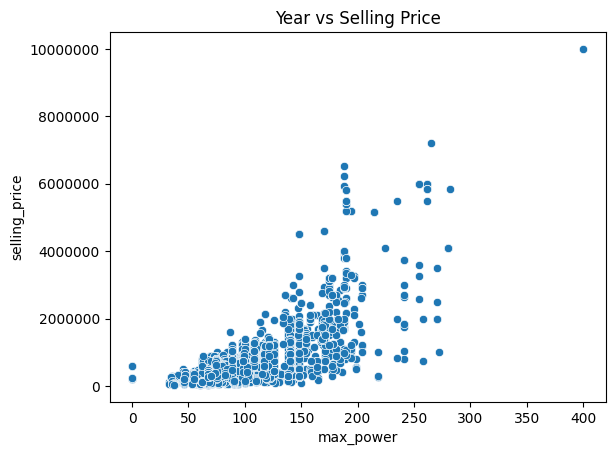

max power car name: Volvo XC90 T8 Excellence BSIV


In [24]:
def func_format(x,pos):
  return int(x)

sns.scatterplot(data=data,x='max_power',y='selling_price')
ax=plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(func_format))
plt.title('Year vs Selling Price')
plt.show()

max_pow_val = data['max_power'].max()
name_maxpow = data[data['max_power']==max_pow_val]['name'].iloc[0]
print(f'max power car name: {name_maxpow}')

Inference:
* This shows that as power increases selling price also increases
* There is one car with 400 max power whose selling price is 1,00,00,000

Looking at the outliers

                               name  year
7                Maruti 800 DX BSII  2001
177                  Maruti 800 Std  1999
186                 Daewoo Matiz SD  2000
316       Mahindra Willys CJ 3B 4X4  1983
774   Hyundai Santro GLS I - Euro I  1999
...                             ...   ...
7982                 Maruti Alto LX  2000
7996      Hyundai Santro LS zipPlus  2000
8025                  Maruti 800 AC  1998
8042     Maruti Gypsy King Soft Top  1997
8115                  Maruti 800 AC  1997

[81 rows x 2 columns]
-------------------------------------------------------------------------


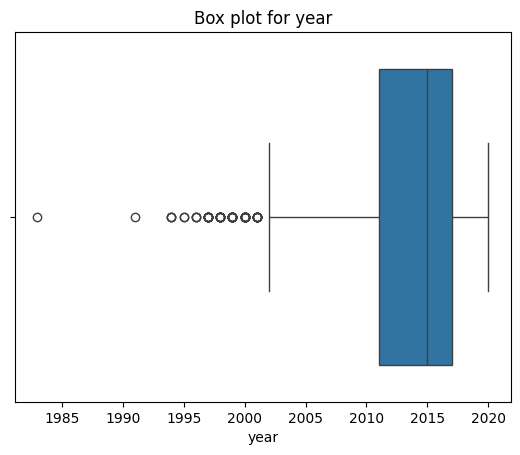

In [25]:
#For year

Q1 = data['year'].quantile(0.25)
Q3 = data['year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['year'] < lower_bound) | (data['year'] > upper_bound)]
print(outliers[['name','year']])

print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='year')
plt.title('Box plot for year')
plt.show()

Inference:
* Total outliers found 88
* Lowest value observed is 1983
* Q1 is 2011 and Q3 is 2017
* Median is 2015
* There are several outliers are from 2002-1983. But there are two promeint or extreme outlier out of 81 records found which are lying at 1983 and 1993.  

                                            name  selling_price
41            Jeep Compass 1.4 Limited Plus BSIV        2100000
47                        Toyota Fortuner 4x4 MT        1500000
49                    Mercedes-Benz B Class B180        1450000
55           Toyota Innova Crysta 2.8 ZX AT BSIV        1650000
57                    Audi A6 2.0 TDI Technology        1750000
...                                          ...            ...
7949  Toyota Innova 2.5 ZX Diesel 7 Seater BSIII        1400000
7967                     BMW 3 Series 320d Sedan        1500000
7973  Toyota Innova 2.5 ZX Diesel 7 Seater BSIII        1400000
8058                     Audi A3 40 TFSI Premium        1689999
8108                    Kia Seltos HTX Plus AT D        1575000

[600 rows x 2 columns]
254999.0
675000.0
450000.0
-------------------------------------------------------------------------


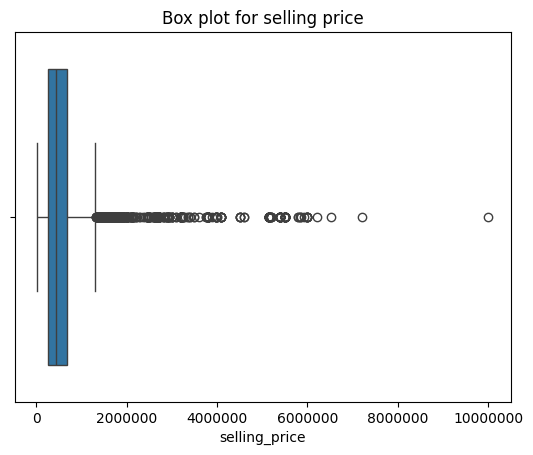

In [26]:
#For Selling Price
from matplotlib.ticker import FuncFormatter

def normal_plot(x,pos):
  return int(x)

Q1 = data['selling_price'].quantile(0.25)
Q3 = data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['selling_price'] < lower_bound) | (data['selling_price'] > upper_bound)]
print(outliers[['name','selling_price']])
print(Q1)
print(Q3)
print(data['selling_price'].median())
print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='selling_price')
ax=plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(normal_plot))
plt.title('Box plot for selling price')
plt.show()

Inference:
* Total outliers found 600
* Lowest value observed is 0
* Q1 is 2,54,999 and Q3 is 6,75,000
* Median is 4,50,000
* There are 600 values from 1800000-6000000. These are due to the mid range cars.
* But there are few cars which go beyond 6000000. These cars are Luxury cars  

                                                   name  mileage(km/ltr/kg)
35                     Maruti Alto 800 CNG LXI Optional               33.44
170                       Volvo XC90 T8 Excellence BSIV               42.00
644   Tata Indica Vista Aura Safire Anniversary Edition                0.00
785                              Hyundai Santro Xing GL                0.00
1649                             Hyundai Santro Xing GL                0.00
1676                Mercedes-Benz M-Class ML 350 4Matic                0.00
2137                    Land Rover Freelander 2 TD4 HSE                0.00
2312                             Maruti Wagon R CNG LXI               32.52
2366                       Hyundai Santro Xing (Non-AC)                0.00
2725                       Hyundai Santro Xing (Non-AC)                0.00
3908                            Maruti Alto 800 CNG LXI               33.44
4527                Mercedes-Benz M-Class ML 350 4Matic                0.00
5276        

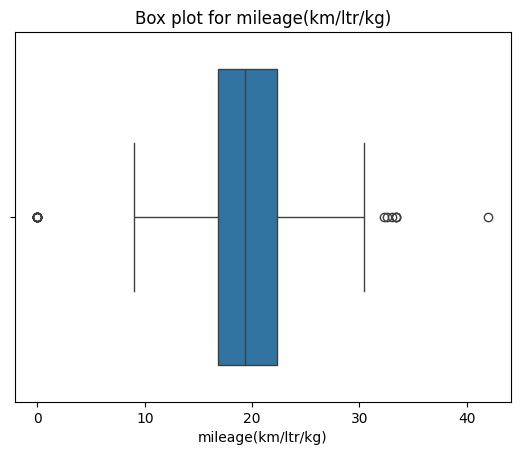

In [27]:
# For Mileage

Q1 = data['mileage(km/ltr/kg)'].quantile(0.25)
Q3 = data['mileage(km/ltr/kg)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['mileage(km/ltr/kg)'] < lower_bound) | (data['mileage(km/ltr/kg)'] > upper_bound)]
print(outliers[['name','mileage(km/ltr/kg)']])


print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='mileage(km/ltr/kg)')
plt.title('Box plot for mileage(km/ltr/kg)')
plt.show()

Inference:
* Total outliers found 24
* Q1 is 16 and Q3 is 22 approx
* Median is 19 approx
* There are cars showing 0 mileage, which has to be taken care of
* Few cars are showing mileage over 30. In this case will keep it as it is.

                                      name  km_driven
272                 Maruti Swift Dzire ZDi     193000
287         Mahindra Bolero DI DX 7 Seater     207890
394   Toyota Innova 2.5 G1 Diesel 8-seater     240000
396         Hyundai Verna XXi ABS (Petrol)     214000
397                  Hyundai Verna CRDi SX     214000
...                                    ...        ...
8031      Chevrolet Enjoy TCDi LT 7 Seater     195000
8033                  Hyundai Verna 1.6 SX     200000
8071   Toyota Innova 2.5 V Diesel 7-seater     200000
8077             Toyota Innova 2.5 E 7 STR     250000
8095             Ford Figo Diesel Titanium     194000

[170 rows x 2 columns]
35000.0
98000.0
60000.0
-------------------------------------------------------------------------


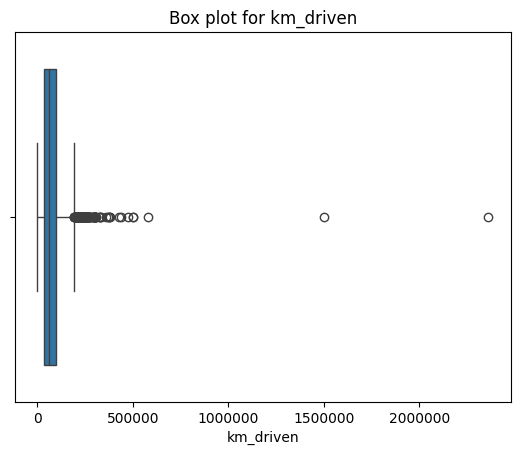

In [28]:
#For Km's Driven

Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['km_driven'] < lower_bound) | (data['km_driven'] > upper_bound)]
print(outliers[['name','km_driven']])
print(Q1)
print(Q3)
print(data['km_driven'].median())

print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='km_driven')
ax=plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(normal_plot))
plt.title('Box plot for km_driven')
plt.show()

Inference:
* Total outliers found 170
* Q1 is 35000 and Q3 is 98000
* Median is 60000
* There are few cars having 100000 to 500000 km.
* There are two cars with 1500000 and more than 2000000 km driven.

                                              name  engine
39                    Tata Safari DICOR 2.2 LX 4x2  2179.0
47                          Toyota Fortuner 4x4 MT  2982.0
48     Toyota Innova 2.5 G (Diesel) 7 Seater BS IV  2494.0
51                     Mitsubishi Pajero Sport 4X4  2477.0
55             Toyota Innova Crysta 2.8 ZX AT BSIV  2755.0
...                                            ...     ...
8071           Toyota Innova 2.5 V Diesel 7-seater  2494.0
8077                     Toyota Innova 2.5 E 7 STR  2494.0
8080              Tata New Safari DICOR 2.2 EX 4x2  2179.0
8099                        Mahindra XUV500 W8 2WD  2179.0
8113  Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV  2494.0

[1183 rows x 2 columns]
1197.0
1582.0
1248.0
-------------------------------------------------------------------------


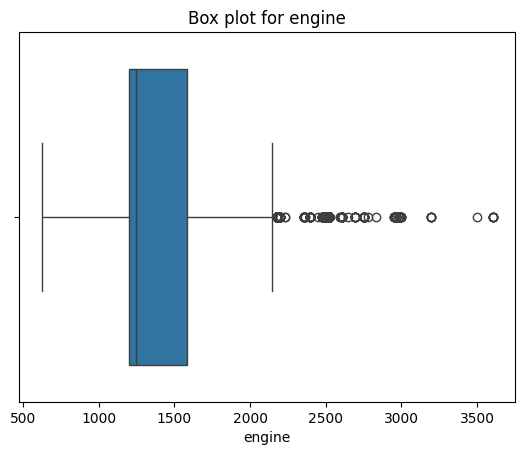

In [29]:
#For Engine

Q1 = data['engine'].quantile(0.25)
Q3 = data['engine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['engine'] < lower_bound) | (data['engine'] > upper_bound)]
print(outliers[['name','engine']])
print(Q1)
print(Q3)
print(data['engine'].median())

print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='engine')
plt.title('Box plot for engine')
plt.show()

Inference:
* Total outliers found 1183
* Q1 is 1197 and Q3 is 1582
* Median is 1248
* There are few cars with engine capacity over 2200. These are found in SUV's and mid segement cars.
* Some high performance cars have engine capacity of over 3000.

                                     name  max_power
41     Jeep Compass 1.4 Limited Plus BSIV     160.77
47                 Toyota Fortuner 4x4 MT     168.50
51            Mitsubishi Pajero Sport 4X4     175.56
55    Toyota Innova Crysta 2.8 ZX AT BSIV     171.50
57             Audi A6 2.0 TDI Technology     174.33
...                                   ...        ...
7967              BMW 3 Series 320d Sedan     181.00
8023              Hyundai Santa Fe 4x4 AT     194.30
8052               Honda CR-V 2.4L 4WD AT     158.80
8057                 Honda Accord 2.4 A/T     177.60
8058              Audi A3 40 TFSI Premium     177.50

[570 rows x 2 columns]
68.05
102.0
82.0
-------------------------------------------------------------------------


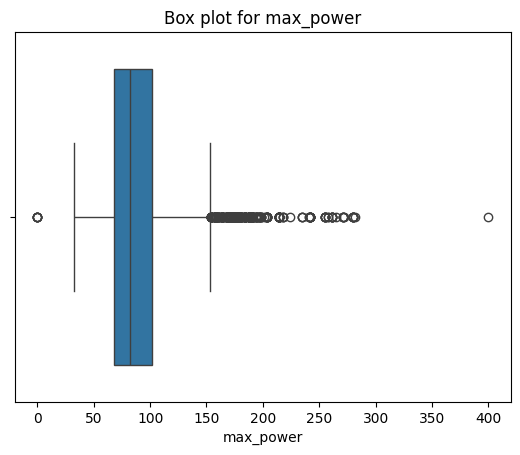

In [30]:
#For max power

Q1 = data['max_power'].quantile(0.25)
Q3 = data['max_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['max_power'] < lower_bound) | (data['max_power'] > upper_bound)]
print(outliers[['name','max_power']])
print(Q1)
print(Q3)
print(data['max_power'].median())

print("-------------------------------------------------------------------------")
sns.boxplot(data=data,x='max_power')
plt.title('Box plot for max_power')
plt.show()

Inference:
* Total outliers 585
* Q1 is 68 and Q3 is 101
* Median value is 82
* One car has max power of zero, which should be taken care of.
* There are few cars whose max power are above 150. These are the cars are premium and high performance.

## **3] Data Cleaning and Preprocessing**

**Handling the null values**

In [31]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

Out of 8128 entries:
* mileage column has 221 null entries
* engine column has 22 null entries
* max_power has 215 null entries
* seats has 221 null entries

In [32]:
rows = ['mileage(km/ltr/kg)','engine','max_power','seats']
for i in rows:
  print(i," ",data[i].dtype)

mileage(km/ltr/kg)   float64
engine   float64
max_power   float64
seats   float64


In [33]:
data[rows]

,mileage(km/ltr/kg),engine,max_power,seats
0,23.40,1248.0,74.00,5.0
1,21.14,1498.0,103.52,5.0
2,17.70,1497.0,78.00,5.0
3,23.00,1396.0,90.00,5.0
4,16.10,1298.0,88.20,5.0
...,...,...,...,...
8123,18.50,1197.0,82.85,5.0
8124,16.80,1493.0,110.00,5.0
8125,19.30,1248.0,73.90,5.0
8126,23.57,1396.0,70.00,5.0


For mileage(km/ltr/kg) column:
* Using simple imputer from sklearn.
* There are three methods in imputation mean,median and mode.
* Mean is used when values are numerical and data shows normal distribution.
* Median is used when data is skewed or it contain outliers.
* Mode is used in categorical features.

skewness nan


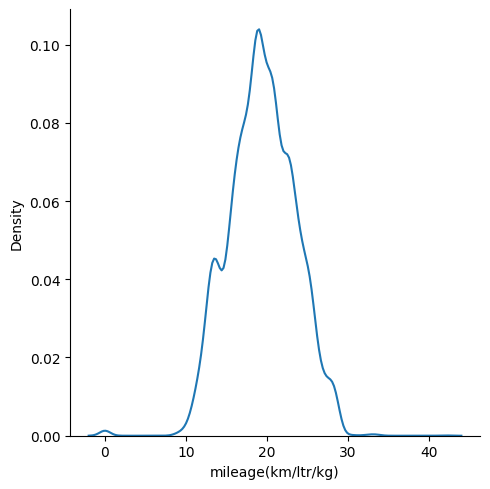

In [34]:
# cheking if mileage is normally distrubuted or not:

sh = data['mileage(km/ltr/kg)']
sns.displot(sh,kind='kde')
sk = skew(sh)
print(f'skewness {sk}')

From the graph we can see that data is almost normally distrubuted and also there is slight skewness close to zero, hence using mean as my imputer for mileage(km/ltr/kg) column

In [35]:
#imputing with mean

imp = SimpleImputer(missing_values=np.nan,strategy='mean')

imp.fit(data[['mileage(km/ltr/kg)']])

data['mileage(km/ltr/kg)'] = imp.transform(data[['mileage(km/ltr/kg)']])

skewness 1.1352691298499176


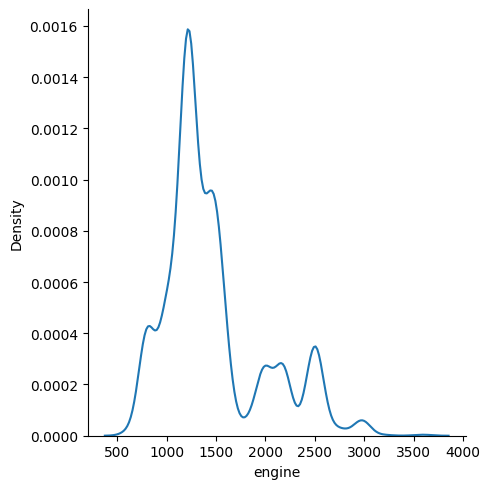

In [36]:
# cheking if enine is normally distrubuted or not:

sns.displot(data['engine'],kind='kde')
ske = data['engine'].skew()
print(f'skewness {ske}')

From above graph it is clear that engine column is positively skewed. For this it is better to use median imputer

In [37]:
#imputing with median

imp = SimpleImputer(missing_values=np.nan,strategy='median')

imp.fit(data[['engine']])

data['engine'] = imp.transform(data[['engine']])

skewness 1.969914080776506


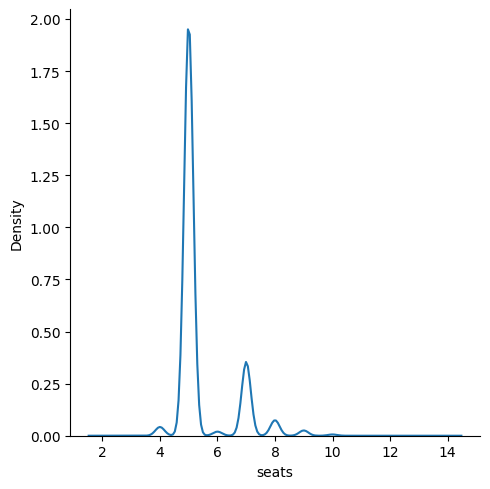

In [38]:
# cheking if seats column is normally distrubuted or not:

sns.displot(data['seats'],kind='kde')
ske = data['seats'].skew()
print(f'skewness {ske}')

From the graph it is clear that seats are particularly concetrated with 5. It is better to use the same value i.e 5 for seats.

In [39]:
#imputing with median

imp_seats = SimpleImputer(missing_values=np.nan,strategy='median')

imp_seats.fit(data[['seats']])

data['seats'] = imp_seats.transform(data[['seats']])

In [40]:
#data['mileage(km/ltr/kg)'].isna().sum()

To handle null values in max_power.

skewness 1.6212607481144414


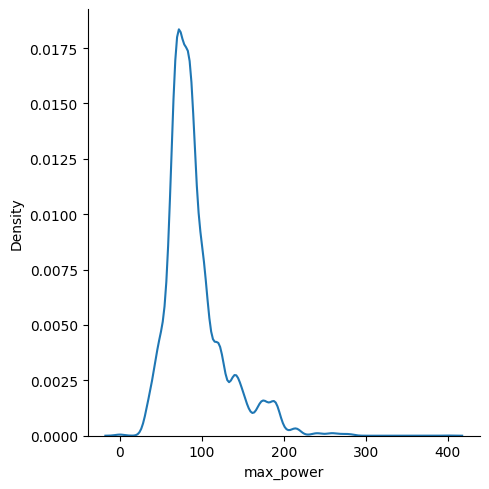

In [41]:
# cheking if max_power column is normally distrubuted or not:

sns.displot(data['max_power'],kind='kde')
ske = data['max_power'].skew()
print(f'skewness {ske}')

max_power is also rightly skewed, hence replaing null values with median.

In [42]:
#imputing with median

imp_pow = SimpleImputer(missing_values=np.nan,strategy='median')

imp_pow.fit(data[['max_power']])

data['max_power'] = imp_pow.transform(data[['max_power']])

**Handle outlier for zero mileage**


As in eda it was observerd that there are some cars showing zero mileage. For such car replacing zero value with mean

In [43]:
data['mileage(km/ltr/kg)'] = data['mileage(km/ltr/kg)'].replace(0,data['mileage(km/ltr/kg)'].mean())

<Axes: xlabel='mileage(km/ltr/kg)'>

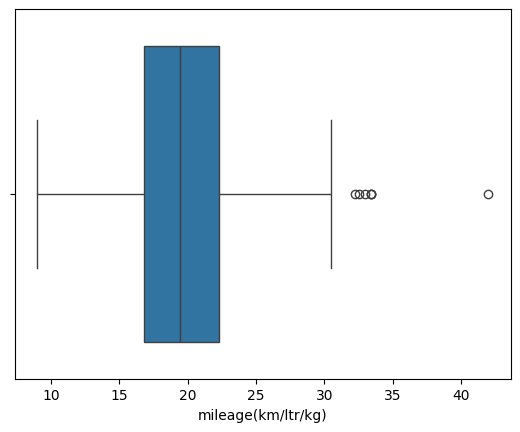

In [44]:
sns.boxplot(data=data,x='mileage(km/ltr/kg)')

Inference:
* As we can observe there are no cars with zero mileage

**Handle zero max power**

As cars cannot have zero max power, replacing them with the max_power of same models

In [45]:
zero_max_pow = data[data['max_power']==0]
count = len(zero_max_pow)
print(f'Total cars with zero max power: {count}')

car_name = zero_max_pow['name'].tolist()
print(f'Cars with zero max power: {car_name}')

Total cars with zero max power: 6
Cars with zero max power: ['Maruti Alto K10 LXI', 'Maruti Alto K10 LXI', 'Maruti Swift Dzire VDI Optional', 'Maruti Swift Dzire VDI Optional', 'Tata Indica Vista Quadrajet LS', 'Tata Indica Vista Quadrajet LS']


<Axes: xlabel='max_power', ylabel='selling_price'>

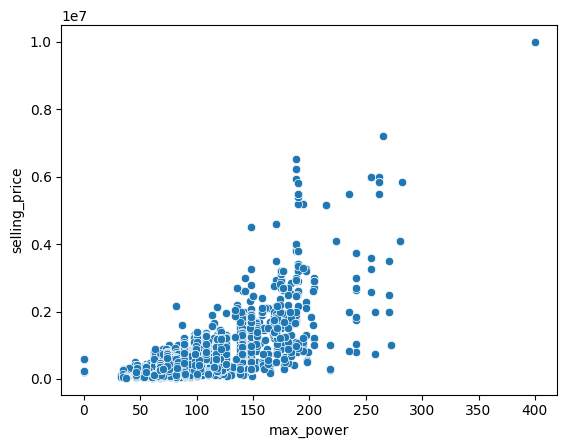

In [46]:
sns.scatterplot(data=data,x='max_power',y='selling_price')

In [47]:
maxpow_dict={} #to store max_power for each car name which has no zero value

for i, row in data.iterrows():
  if row['max_power']!=0:
    maxpow_dict[row['name']]=row['max_power']

for j,row in data.iterrows():
  if row['max_power']==0 and row['name'] in maxpow_dict:
    data.at[j,'max_power']=maxpow_dict[row['name']]

print(data['max_power']==0)

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: max_power, Length: 8128, dtype: bool


In [48]:
data = data.drop(['name'],axis=1)

**seprating feature variables and target variable**

In [56]:
X = data.drop(['selling_price'],axis=1)
y = data['selling_price']

##**4] Spliting the dataset**

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6502, 10)
X_test shape: (1626, 10)
y_train shape: (6502,)
y_test shape: (1626,)


In [59]:
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns

num_transform=StandardScaler()
cat_transform=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("one-hot-encoder",cat_transform,cat_features),
    ("standard-scaler",num_transform,num_features),
])

X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

## **5] Model Building**

In [60]:
models={
    'Linear Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'XGBoost':XGBRegressor(),
    'AdaBoost':AdaBoostRegressor()
}


In [61]:
def model_eval(true,pred):
  mae=mean_absolute_error(true,pred)
  rmse=sqrt(mean_squared_error(true,pred))
  r2=r2_score(true,pred)

  return mae,rmse,r2

In [62]:
from math import sqrt

model_list=[]
r2_list=[]
mae_list=[]
rmse_list=[]

for i in range(len(models)):
  model=(list(models.values())[i])

  #model training:
  model.fit(X_train,y_train)

  #predictions on train set
  ypred_train=model.predict(X_train)

  #predictions on test set
  ypred_test=model.predict(X_test)

  #model evalution on train set
  model_train_mae,model_train_rmse,model_train_r2=model_eval(y_train,ypred_train)

  #model evaluation on test set
  model_test_mae,model_test_rmse,model_test_r2=model_eval(y_test,ypred_test)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance on training set')
  print(f'MAE:{model_train_mae}')
  print(f'RMSE:{model_train_rmse}')
  print(f'R2:{model_train_r2}')

  print('-----------------------------------------')

  print('Model performance on test set')
  print(f'MAE:{model_test_mae}')
  print(f'RMSE:{model_test_rmse}')
  print(f'R2:{model_test_r2}')

  r2_list.append(model_test_r2)
  mae_list.append(model_test_mae)
  rmse_list.append(model_test_rmse)


  print('\n')

Linear Regression
Model performance on training set
MAE:271252.6430329129
RMSE:453982.9756232014
R2:0.6822297200540137
-----------------------------------------
Model performance on test set
MAE:268590.8720787208
RMSE:443762.4166570775
R2:0.6995732159320884


KNN
Model performance on training set
MAE:74469.644078745
RMSE:158406.18255936497
R2:0.9613118112166086
-----------------------------------------
Model performance on test set
MAE:95384.65006150061
RMSE:181022.07305090627
R2:0.9500079804923861


SVR
Model performance on training set
MAE:380992.0828597611
RMSE:826966.5805345272
R2:-0.05441132211472244
-----------------------------------------
Model performance on test set
MAE:378568.7003934064
RMSE:830697.2799178341
R2:-0.052745005566988024


Decision Tree
Model performance on training set
MAE:3608.7772216043977
RMSE:15207.448770503825
R2:0.9996434283040836
-----------------------------------------
Model performance on test set
MAE:86949.0017819409
RMSE:246616.93932098305
R2:0.9072

In [63]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
4,Random Forest,0.968909
5,XGBoost,0.968709
1,KNN,0.950008
3,Decision Tree,0.907214
0,Linear Regression,0.699573
6,AdaBoost,0.697913
2,SVR,-0.052745


## **6] HyperParameter Tuning**

In [67]:
#HyperParameter

param={
  "Linear Regression":{},
  "KNN":{
    'n_neighbors':np.arange(1,20),
    'weights':['uniform','distance']
},
  "SVR":{
    'kernel':['linear'],
    'C':[10,50,100,150,200],
    'epsilon':[0.01,0.1,0.5,1.0,1.5,2.0]
},
  "Decision Tree":{
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':np.arange(1,20),
    'min_samples_split':np.arange(2,20),
},
  "Random Forest":{
    'n_estimators':[10,50,100,150,200,250,300]
},
  "XGBoost":{
    'learning_rate':[0.001,0.01,0.1,1.0,1.5,2.0],
    'n_estimators':[10,50,100,150,200,250,300]
},
  "AdaBoost":{
    'n_estimators':[10,50,100,150,200,250,300],
    'learning_rate':[0.001,0.01,0.1,1.0,1.5,2.0],
    'loss':['linear','square','exponential']
}

}


In [68]:
tune_r2=[]
models_predictions={}

def tuning(models,param,X_train,X_test,y_train,y_test):
  best_models={}

  for model_name,model_instance in models.items():
    tune_params=param.get(model_name,{}) #getting the correct model name from models and from param and storing it in tune_params

    #performing grid search:
    gs=GridSearchCV(estimator=model_instance,param_grid=tune_params,cv=5,scoring='r2',n_jobs=-1)
    gs.fit(X_train,y_train)

    #storing the best model
    best_models[model_name]=gs.best_estimator_

    print(f'best parameters for {model_name} are: ',best_models[model_name])
    print(f'{model_name} best score: {gs.best_score_}')

    #predicting on test set:
    ypred_test=gs.best_estimator_.predict(X_test)
    tune_test_mae,tune_test_rmse,tune_test_r2=model_eval(y_test,ypred_test)

    #storing every model's predictions:
    models_predictions[model_name]=ypred_test

    print(f"performance on test set after tuning:")
    print(f"MAE: {tune_test_mae}")
    print(f"RMSE: {tune_test_rmse}")
    print(f"R2: {tune_test_r2}")
    print("--------------------------------------------------------")
    tune_r2.append(tune_test_r2)


In [69]:
tuning(models,param,X_train,X_test,y_train,y_test)


best parameters for Linear Regression are:  LinearRegression()
Linear Regression best score: 0.6750429568775356
performance on test set after tuning:
MAE: 268590.8720787208
RMSE: 443762.4166570775
R2: 0.6995732159320884
--------------------------------------------------------
best parameters for KNN are:  KNeighborsRegressor(n_neighbors=4, weights='distance')
KNN best score: 0.948101612524526
performance on test set after tuning:
MAE: 78536.39859932788
RMSE: 165295.48122358587
R2: 0.9583169417475891
--------------------------------------------------------
best parameters for SVR are:  SVR(C=200, epsilon=2.0, kernel='linear')
SVR best score: 0.4150013856419954
performance on test set after tuning:
MAE: 229266.02634139196
RMSE: 607393.4324279919
R2: 0.4371692766209725
--------------------------------------------------------
best parameters for Decision Tree are:  DecisionTreeRegressor(criterion='poisson', max_depth=14, min_samples_split=15)
Decision Tree best score: 0.9499256693067217
pe

In [70]:
pd.DataFrame(list(zip(model_list,r2_list,tune_r2)),
             columns=['Model Name','R2 Score','R2 Score(after tuning)']).sort_values(by=['R2 Score'],
             ascending=False)

,Model Name,R2 Score,R2 Score(after tuning)
4,Random Forest,0.968909,0.971405
5,XGBoost,0.968709,0.968339
1,KNN,0.950008,0.958317
3,Decision Tree,0.907214,0.960004
0,Linear Regression,0.699573,0.699573
6,AdaBoost,0.697913,0.888832
2,SVR,-0.052745,0.437169


In [80]:
rf_ypred=models_predictions.get('Random Forest')

In [84]:
pd.options.display.float_format = '{:.2f}'.format
rf_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':rf_ypred,'Difference':abs(y_test-rf_ypred)})
rf_df

,Actual Value,Predicted Value,Difference
1971,198000,173549.00,24451.00
4664,500000,577371.04,77371.04
5448,425000,443322.03,18322.03
3333,150000,159779.96,9779.96
2316,525000,379627.78,145372.22
...,...,...,...
1149,5500000,5500000.00,0.00
5002,370000,514826.49,144826.49
6008,374000,416573.21,42573.21
2283,575000,803369.83,228369.83


<Axes: xlabel='selling_price'>

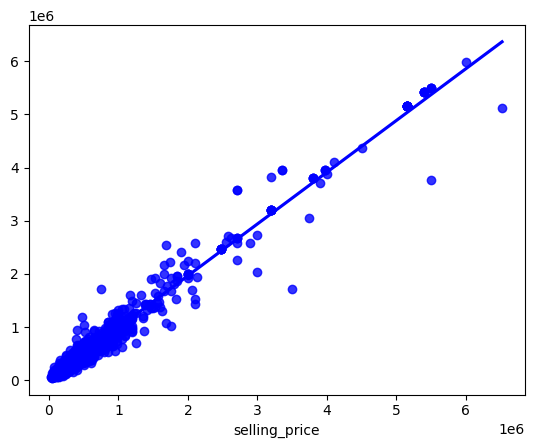

In [77]:
sns.regplot(x=y_test,y=rf_ypred,ci=None,color='blue')

## **CONCLUSION:**

Random Forest has performed well compared to rest of the models. It is noted that XGBoost has also performed well even without hyperparameter tuning. SVR has performed poorly compareed to rest of the models.

## **Additional Part:**

**Using Neural Networks**

In [88]:
#using ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,PReLU
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()
#input layer:
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(PReLU())

#1 hidden layer:
model.add(Dropout(rate=0.3))
model.add(Dense(64))
model.add(PReLU())

#2nd hidden layer:
model.add(Dropout(rate=0.3))
model.add(Dense(64))
model.add(PReLU())

#output layer:
model.add(Dense(1,activation='linear'))

In [89]:
#model compile:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mae']
)

In [90]:
early_stopping=EarlyStopping(monitor='val_loss',patience=10,min_delta=0.001,restore_best_weights=True)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=500,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/500
204/204 [==============================] - 3s 5ms/step - loss: 631507.4375 - mae: 631507.4375 - val_loss: 590701.2500 - val_mae: 590701.2500
Epoch 2/500
204/204 [==============================] - 1s 4ms/step - loss: 418625.8438 - mae: 418625.8438 - val_loss: 292688.0312 - val_mae: 292688.0312
Epoch 3/500
204/204 [==============================] - 1s 4ms/step - loss: 258188.2188 - mae: 258188.2188 - val_loss: 230135.7188 - val_mae: 230135.7188
Epoch 4/500
204/204 [==============================] - 1s 4ms/step - loss: 226402.9375 - mae: 226402.9375 - val_loss: 211871.7656 - val_mae: 211871.7656
Epoch 5/500
204/204 [==============================] - 1s 4ms/step - loss: 213535.3594 - mae: 213535.3594 - val_loss: 201297.4375 - val_mae: 201297.4375
Epoch 6/500
204/204 [==============================] - 1s 4ms/step - loss: 204313.3750 - mae: 204313.3750 - val_loss: 194869.0781 - val_mae: 194869.0781
Epoch 7/500
204/204 [==============================] - 1s 4ms/step - loss: 201171.

In [91]:
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s 2ms/step - loss: 101720.8828 - mae: 101720.8828


[101720.8828125, 101720.8828125]

In [92]:
pred=model.predict(X_test).flatten()

pred_df=pd.DataFrame({'Actual':y_test,'Predicted':pred,'Difference':abs(y_test-pred)})
pd.options.display.float_format = '{:.2f}'.format
print(pred_df)

51/51 [==============================] - 0s 2ms/step
       Actual  Predicted  Difference
1971   198000  104279.11    93720.89
4664   500000  727846.88   227846.88
5448   425000  529113.88   104113.88
3333   150000  148707.09     1292.91
2316   525000  342277.75   182722.25
...       ...        ...         ...
1149  5500000 4927665.50   572334.50
5002   370000  491585.06   121585.06
6008   374000  410728.75    36728.75
2283   575000  739840.50   164840.50
5428   140000  291024.25   151024.25

[1626 rows x 3 columns]


In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 p_re_lu (PReLU)             (None, 128)               128       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 p_re_lu_1 (PReLU)           (None, 64)                64        
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4

Text(0.5, 1.0, 'Actual vs Predicted')

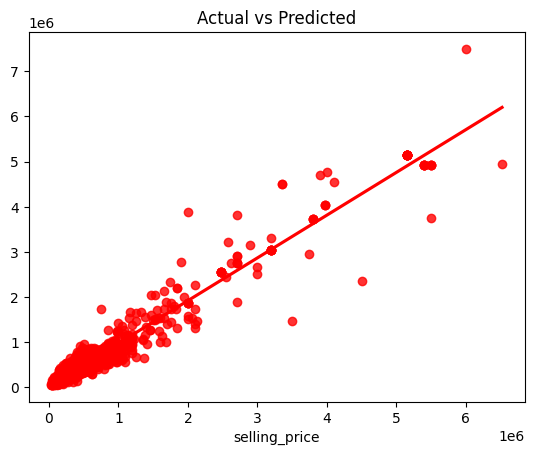

In [94]:
sns.regplot(x=y_test,y=pred,ci=None,color ='red');
plt.title('Actual vs Predicted')

In [99]:
#metrics.explained_variance_score(y_test,pred)
print(f'R2 Score {metrics.r2_score(y_test,pred)}')

R2 Score 0.9444733507333264


## **Please do share your thoughts.**